<a href="https://colab.research.google.com/github/rahuljungbahadur/hands_on_ml_book/blob/main/fashionMNIST_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer learning on Fashion MNIST

A transfer learning example for Fashion-MNISt dataset. 

Subset the dataset so that the `main` set consists of 8 classes and the `transferLearning` one consists of 2. Then apply the learnt weights and biases to the 2 classes subset


In [1]:
from tensorflow.keras.datasets import fashion_mnist

Load data and subset it

In [7]:
help(fashion_mnist.load_data)

Help on function load_data in module keras.datasets.fashion_mnist:

load_data()
    Loads the Fashion-MNIST dataset.
    
    This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,
    along with a test set of 10,000 images. This dataset can be used as
    a drop-in replacement for MNIST.
    
    The classes are:
    
    | Label | Description |
    |:-----:|-------------|
    |   0   | T-shirt/top |
    |   1   | Trouser     |
    |   2   | Pullover    |
    |   3   | Dress       |
    |   4   | Coat        |
    |   5   | Sandal      |
    |   6   | Shirt       |
    |   7   | Sneaker     |
    |   8   | Bag         |
    |   9   | Ankle boot  |
    
    Returns:
      Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **x_train**: uint8 NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data.
    
    **y_train**: uint8 NumPy array of labels (integers in range 0-9)
      with shape `(60000,)` f

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

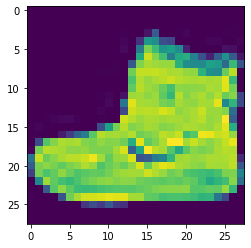

In [5]:
plt.imshow(X_train[0])   ## its a shoe

Let's subset `Shirt` and `Sneaker`. THese are the items encoded as `6` and `7` respectively.

## Subsetting train and test data into main and tl subsets

Train the model on the `main` subset and then used the learnt weights and biases on the `tl` subset

In [14]:
main_indices = (y_train!=6)&(y_train!=7)

In [15]:
X_train_main = X_train[main_indices]

In [17]:
X_train.shape

(60000, 28, 28)

In [16]:
X_train_main.shape

(48000, 28, 28)

In [18]:
y_train_main = y_train[main_indices]

In [20]:
main_test_indices = np.logical_not(np.isin(y_test, [6,7]))

In [21]:
X_test_main = X_test[main_test_indices]
y_test_main = y_test[main_test_indices]

In [22]:
##TL indices
tl_train_indices = np.isin(y_train, [6,7])
X_train_tl = X_train[tl_train_indices]
y_train_tl = y_train[tl_train_indices]

In [24]:
X_train_tl.shape

(12000, 28, 28)

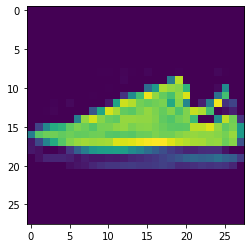

In [28]:
## Sample of X_tl
plt.imshow(X_train_tl[6])  ## Has Shirt
plt.imshow(X_train_tl[0])  ## Has Sneakers

In [29]:
## TL test indices
tl_test_indices = np.isin(y_test, [6,7])
X_test_tl = X_test[tl_test_indices]
y_test_tl = y_test[tl_test_indices]

## Creating main model

In [49]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Input
from tensorflow.keras.activations import elu, relu, softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint

In [36]:
X_train_main.shape

(48000, 28, 28)

In [38]:
help(Model)

Help on class Model in module keras.engine.training:

class Model(keras.engine.base_layer.Layer, keras.utils.version_utils.ModelVersionSelector)
 |  Model(*args, **kwargs)
 |  
 |  `Model` groups layers into an object with training and inference features.
 |  
 |  Args:
 |      inputs: The input(s) of the model: a `keras.Input` object or list of
 |          `keras.Input` objects.
 |      outputs: The output(s) of the model. See Functional API example below.
 |      name: String, the name of the model.
 |  
 |  There are two ways to instantiate a `Model`:
 |  
 |  1 - With the "Functional API", where you start from `Input`,
 |  you chain layer calls to specify the model's forward pass,
 |  and finally you create your model from inputs and outputs:
 |  
 |  ```python
 |  import tensorflow as tf
 |  
 |  inputs = tf.keras.Input(shape=(3,))
 |  x = tf.keras.layers.Dense(4, activation=tf.nn.relu)(inputs)
 |  outputs = tf.keras.layers.Dense(5, activation=tf.nn.softmax)(x)
 |  model = tf.kera

In [55]:
## Building the model

## Input layer
input_layer = Input(shape=[28,28], batch_size=32)

## Flattening layer
flatten_input = Flatten()(input_layer)

## BatchNormaliation
batch_norm1 = BatchNormalization(name='batchNorm1')(flatten_input)

## HiddenLayer1
hidden1 = Dense(500, activation=elu, name='hidden1')(batch_norm1)

##BatchNorm2
batch_norm2 = BatchNormalization(name='batchNorm2')(hidden1)

## Hidden 2
hidden2 = Dense(100, activation=elu)(batch_norm2)

## BatchNorm3
batch_norm3 = BatchNormalization(name='batchNorm3')(hidden2)

## Hidden 3
hidden3 = Dense(50, activation=elu)(batch_norm3)

## BatchNorm4
batch_norm4 = BatchNormalization(name='batchNorm4')(hidden3)

## output layer
output_layer = Dense(10, activation=softmax)(batch_norm4)

model1 = Model(inputs=[input_layer], outputs=[output_layer])

In [56]:
model1.summary()   ### Good that I can account for each of the output params

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(32, 28, 28)]            0         
                                                                 
 flatten_4 (Flatten)         (32, 784)                 0         
                                                                 
 batchNorm1 (BatchNormalizat  (32, 784)                3136      
 ion)                                                            
                                                                 
 hidden1 (Dense)             (32, 500)                 392500    
                                                                 
 batchNorm2 (BatchNormalizat  (32, 500)                2000      
 ion)                                                            
                                                                 
 dense_11 (Dense)            (32, 100)                 5010

In [57]:
compiled_main_model = model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Convert y from list to categorical

In [45]:
np.unique(y_train_main)  

array([0, 1, 2, 3, 4, 5, 8, 9], dtype=uint8)

In [48]:
y_train_main2 = to_categorical(y_train_main)
y_test_main2 = to_categorical(y_test_main)

In [47]:
y_train_main2.shape

(48000, 10)

In [51]:
import os

In [52]:
os.mkdir('/saved_models')

In [58]:
earlyStop = EarlyStopping(patience=5)
modelcp = ModelCheckpoint(filepath='/saved_models/FasionMnistMainModel.h5', save_best_only=True)


In [59]:
model1.fit(x=X_train_main, y=y_train_main2, epochs=100, callbacks=[earlyStop, modelcp], validation_data=(X_test_main, y_test_main2))

Epoch 1/100
1500/1500 [==============================] - 20s 12ms/step - loss: 0.3123 - accuracy: 0.8929 - val_loss: 0.2483 - val_accuracy: 0.9144
Epoch 2/100
1500/1500 [==============================] - 20s 13ms/step - loss: 0.2279 - accuracy: 0.9198 - val_loss: 0.2442 - val_accuracy: 0.9162
Epoch 3/100
1500/1500 [==============================] - 19s 12ms/step - loss: 0.2018 - accuracy: 0.9294 - val_loss: 0.2210 - val_accuracy: 0.9250
Epoch 4/100
1500/1500 [==============================] - 20s 13ms/step - loss: 0.1811 - accuracy: 0.9350 - val_loss: 0.2136 - val_accuracy: 0.9294
Epoch 5/100
1500/1500 [==============================] - 19s 12ms/step - loss: 0.1655 - accuracy: 0.9404 - val_loss: 0.2048 - val_accuracy: 0.9340
Epoch 6/100
1500/1500 [==============================] - 18s 12ms/step - loss: 0.1514 - accuracy: 0.9449 - val_loss: 0.1958 - val_accuracy: 0.9367
Epoch 7/100
1500/1500 [==============================] - 19s 13ms/step - loss: 0.1396 - accuracy: 0.9490 - val_loss: 0

## Model Evaluation and Prediction

## Plot of train and validation loss

In [100]:
model1.history.history

{}

In [60]:
model1.evaluate(X_test_main, y_test_main2)

250/250 [==============================] - 1s 4ms/step - loss: 0.2215 - accuracy: 0.9362


[0.2214941382408142, 0.9362499713897705]

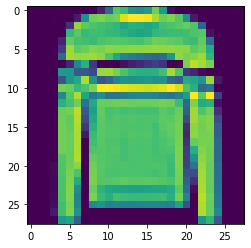

In [61]:
## Simple prediction
plt.imshow(X_train_main[5])

In [70]:
predicted = np.argmax(model1.predict(X_train_main[:32]), axis=1)

In [71]:
predicted

array([9, 0, 0, 3, 0, 2, 2, 5, 5, 0, 9, 5, 5, 9, 1, 0, 4, 3, 1, 4, 8, 2,
       3, 0, 2, 4, 4, 5, 3, 0, 8, 9])

In [72]:
y_train_main[:32]

array([9, 0, 0, 3, 0, 2, 2, 5, 5, 0, 9, 5, 5, 9, 1, 0, 4, 3, 1, 4, 8, 4,
       3, 0, 2, 4, 4, 5, 3, 0, 8, 5], dtype=uint8)

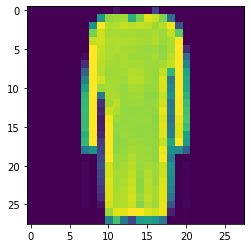

In [73]:
plt.imshow(X_train_main[22])

## Getting the weights and biases of the trained hidden layers

These would then be used for training the `transfer-learning` classifier

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


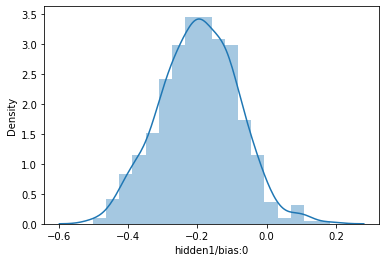

In [83]:
sns.distplot(model1.layers[3].bias)

It is interesting to note that the distribution of the `bias` for any partivular hidden layer is normal. This is due to the fact that `BatchNormalization` was used.

## Creating model2

This would be using the layers from the model1

In [88]:
model1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(32, 28, 28)]            0         
                                                                 
 flatten_4 (Flatten)         (32, 784)                 0         
                                                                 
 batchNorm1 (BatchNormalizat  (32, 784)                3136      
 ion)                                                            
                                                                 
 hidden1 (Dense)             (32, 500)                 392500    
                                                                 
 batchNorm2 (BatchNormalizat  (32, 500)                2000      
 ion)                                                            
                                                                 
 dense_11 (Dense)            (32, 100)                 5010

In [87]:
len(model1.layers)

10